In [1]:
from google.colab import drive

# make Google drive available for use (dataset is saved there)
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [2]:
# extract dataset RAR file to session storage
!unrar x gdrive/MyDrive/NMDU/data.rar

Streaming output truncated to the last 5000 lines.
Extracting  data/valid/labels/00000_NewFire (3799).txt                    60%  OK 
Extracting  data/valid/labels/00000_NewFire (2481).txt                    60%  OK 
Extracting  data/valid/labels/NoFire (3127).txt                           60%  OK 
Extracting  data/valid/labels/00000_Fire 712.txt                          60%  OK 
Extracting  data/valid/labels/00000_NewFire (5991).txt                    60%  OK 
Extracting  data/valid/labels/NoFire (2489).txt                           60%  OK 
Extracting  data/valid/labels/NoFire (2374).txt                           60%  OK 
Extracting  data/valid/labels/NoFire (545).txt                            60%  OK 
Extracting  data/valid/labels/NoFire (583).txt                            60%  OK 
Extracting  data/valid/labels/NoFire (1852).txt                           60%  OK 
Extracting  data/valid/labels

In [3]:
import os
import numpy as np

print("Filenames of training images:")
trainImagesFilenames = np.sort(os.listdir(os.path.join("data/train/images")))
print(trainImagesFilenames)
print(trainImagesFilenames.shape)
print("\nFilenames of training labels:")
trainLabelsFilenames = np.sort(os.listdir(os.path.join("data/train/labels")))
print(trainLabelsFilenames)
print(trainLabelsFilenames.shape)

Filenames of training images:
['00000_0806078-LGPT.jpg' '00000_1442072-LGPT.jpg'
 '00000_1442211-LGPT.jpg' ... 'NoFire (995).jpg' 'NoFire (998).jpg'
 'NoFire (999).jpg']
(4124,)

Filenames of training labels:
['00000_0806078-LGPT.txt' '00000_1442072-LGPT.txt'
 '00000_1442211-LGPT.txt' ... 'NoFire (995).txt' 'NoFire (998).txt'
 'NoFire (999).txt']
(4124,)


In [4]:
np.random.seed(8)

# select 9 random images to be shown with rectangle boxes
numberOfItemsToShow = 9
indicesForSelection = np.random.choice(trainImagesFilenames.shape[0], numberOfItemsToShow, replace = False)
filenamesOfImagesToShow = trainImagesFilenames[indicesForSelection]
filenamesOfLabelsToShow = trainLabelsFilenames[indicesForSelection]

print("Filenames of images to be shown:\n", filenamesOfImagesToShow)
print("\nFilenames of labels for boxes of images:\n", filenamesOfLabelsToShow)

Filenames of images to be shown:
 ['00000_Fire 365.jpg' 'NoFire (1608).jpg' '00000_NewFire (5847).jpg'
 'NoFire (2450).jpg' '00000_NewFire (242).jpg' '00000_Fire 1717.jpg'
 'NoFire (3267).jpg' 'NoFire (1710).jpg' '00000_Fire 1451.jpg']

Filenames of labels for boxes of images:
 ['00000_Fire 365.txt' 'NoFire (1608).txt' '00000_NewFire (5847).txt'
 'NoFire (2450).txt' '00000_NewFire (242).txt' '00000_Fire 1717.txt'
 'NoFire (3267).txt' 'NoFire (1710).txt' '00000_Fire 1451.txt']


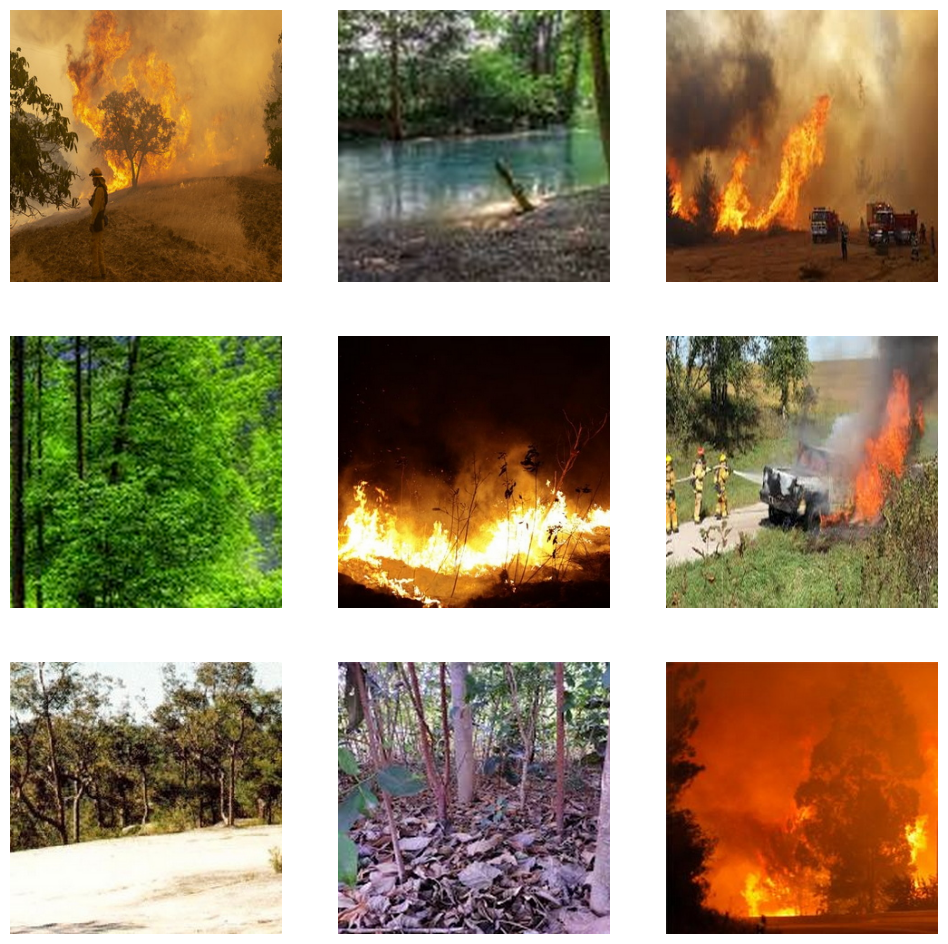

In [5]:
import matplotlib.pyplot as plt
import cv2

# display first 9 images from list to a plot of 3x3 dimensions

# set plot config
nrows, ncols = 3, 3
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

# display images in plot

for i, imgPath in enumerate(filenamesOfImagesToShow):
  # turn off subplot axis
  subPlot = plt.subplot(nrows, ncols, i + 1)
  subPlot.axis("Off")

  # show image
  img = cv2.imread(os.path.join("data/train/images", imgPath))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)

plt.show()

In [6]:
# labels format:
# - there is no fire if first number is 1
# - there is fire if first number is 0
# - there can be multiple fires in one image
# - last line is empty

numberOfImagesContaining2Lines, numberOfImagesContaining3Lines, numberOfImagesContaining4Lines, numberOfemptyLastLines = 0, 0, 0, 0
for labelFilename in trainLabelsFilenames:
  with open(os.path.join("data/train/labels", labelFilename)) as f:
    labelFileContent = f.read()
  match len(labelFileContent.split("\n")):
    case 2:
      numberOfImagesContaining2Lines += 1
    case 3:
      numberOfImagesContaining3Lines += 1
    case 4:
      numberOfImagesContaining4Lines += 1
    case _:
      print("Number of lines in file is not in interval [2, 4]")
  if labelFileContent.split("\n")[-1] == "":
    numberOfemptyLastLines += 1

print("Number of images containing up to 1 fire:", numberOfImagesContaining2Lines)
print("Number of images containing 2 fires:", numberOfImagesContaining3Lines)
print("Number of images containing 3 fires:", numberOfImagesContaining4Lines)
print("Number of empty last lines:", numberOfemptyLastLines)
print("Number of images containing 0 to 3 fires:", numberOfImagesContaining2Lines + numberOfImagesContaining3Lines + numberOfImagesContaining4Lines)
print("Is number of images containing 0 to 3 fires equal to number of images?", (numberOfImagesContaining2Lines + numberOfImagesContaining3Lines + numberOfImagesContaining4Lines) == len(trainLabelsFilenames))

Number of images containing up to 1 fire: 4087
Number of images containing 2 fires: 32
Number of images containing 3 fires: 5
Number of empty last lines: 4124
Number of images containing 0 to 3 fires: 4124
Is number of images containing 0 to 3 fires equal to number of images? True


In [7]:
# labels to be shown
print("Labels contents:")
for index, labelFilename in enumerate(filenamesOfLabelsToShow):
  with open(os.path.join("data/train/labels", labelFilename)) as f:
    labelFileContent = f.read()
  print(f"\nLabel {index + 1}:")
  print(f"'{labelFileContent}'")

Labels contents:

Label 1:
'0 0.448161 0.329431 0.568562 0.645485
'

Label 2:
'1 0.500000 0.500000 1.000000 1.000000
'

Label 3:
'0 0.406355 0.581940 0.438127 0.535117
'

Label 4:
'1 0.500000 0.500000 1.000000 1.000000
'

Label 5:
'0 0.506689 0.740803 0.986622 0.438127
'

Label 6:
'0 0.787625 0.418060 0.331104 0.622074
'

Label 7:
'1 0.500000 0.500000 1.000000 1.000000
'

Label 8:
'1 0.500000 0.500000 1.000000 1.000000
'

Label 9:
'0 0.602007 0.725753 0.775920 0.454849
'


In [8]:
# parses contents of a file which contains labels, returns list of split data of labels
def parseLabelFileContents(fileContents):
  lines = fileContents.split("\n")
  splitLines = [line.split() for line in lines if line != ""]
  return splitLines

In [9]:
# gets coordinates of rectangle boxes based off of labels and image width, returns list of tuples
def getRectangleBoxCoordinates(labels, imgWidth):
  # handle 'no fire' cases
  if len(labels) == 0: return None
  if int(labels[0][0]) == 1: return None

  # make a list of coordinates for rectangles and return it
  listOfCoordinates = []
  for label in labels:
    coordinates = [float(x) for x in label[1:]]
    x, y, width, height = [int(coordinate * imgWidth) for coordinate in coordinates]
    listOfCoordinates.append((x, y, width, height))
  return listOfCoordinates

In [10]:
# returns data for creating a rectangle in a shape of 2 tuples (x1, y1), (x2, y2) where T1 is top left corner and T2 is bottom right corner
def getRectangleData(coords):
  if coords is None: return None
  return (coords[0] - int(coords[2] / 2), coords[1] - int(coords[3] / 2)), (coords[0] + int(coords[2] / 2), coords[1] + int(coords[3] / 2))

In [11]:
# draws a green rectangle based off of coordinates for top left and bottom right corners on the received image
def drawRectangleToImage(coordinates, image):
  coordinatesTuple = getRectangleData(coordinates)
  image = cv2.rectangle(image, coordinatesTuple[0], coordinatesTuple[1], (0, 255, 0), 2)

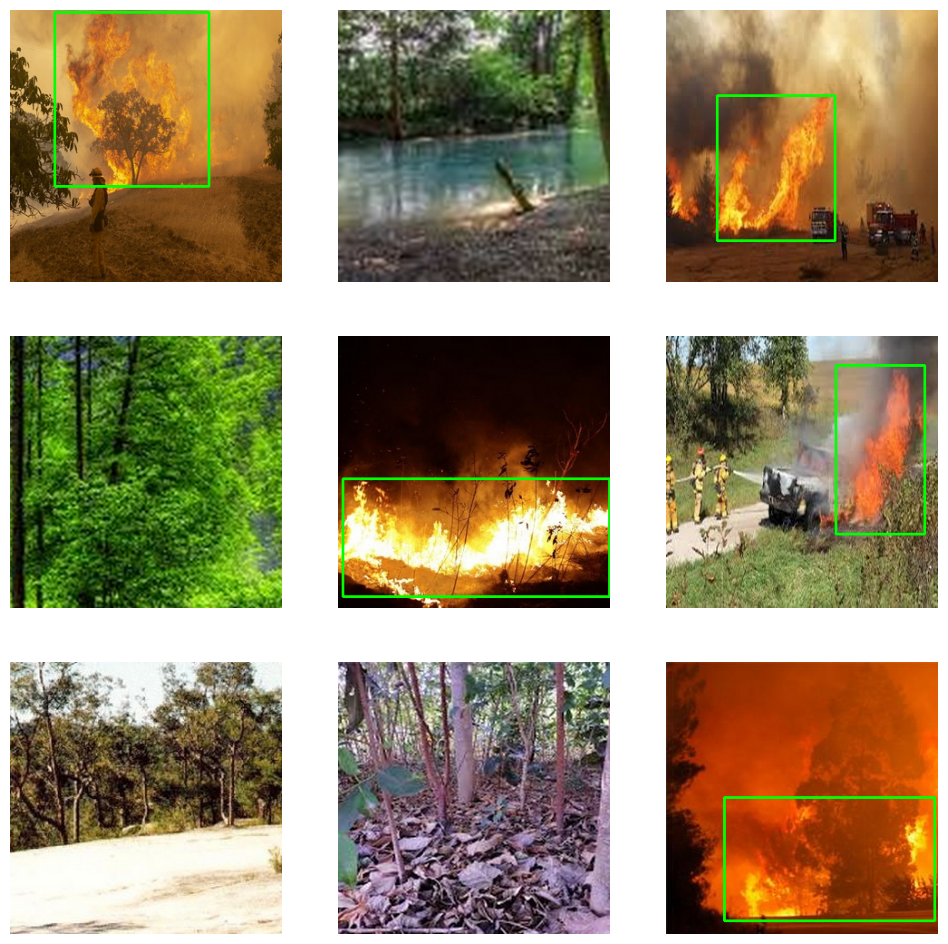

In [12]:
# set plot config
nrows, ncols = 3, 3
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, labelFilename in enumerate(filenamesOfLabelsToShow):
  # turn off subplot axis
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis("Off")

  # load image
  img = cv2.imread(os.path.join("data/train/images", filenamesOfImagesToShow[list(filenamesOfLabelsToShow).index(labelFilename)]))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # get coordinates for boundary boxes
  with open(os.path.join("data/train/labels", labelFilename)) as f:
    labelFileContent = f.read()
  listOfCoordinates = getRectangleBoxCoordinates(parseLabelFileContents(labelFileContent), 300)

  # draw boundary boxes to image
  if listOfCoordinates is not None:
    for coordinates in listOfCoordinates:
      drawRectangleToImage(coordinates, img)
  plt.imshow(img)

plt.savefig("DataDisplay.png", bbox_inches = "tight")
plt.show()